In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

from generator import UnetGenerator, downsample_layer, upsample_layer, generator_loss, generate_images
from discriminator import PatchDiscriminator
import cmp_facades_dataset as facades

/home/jupyter/.keras/datasets/facades/


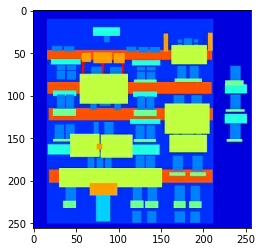

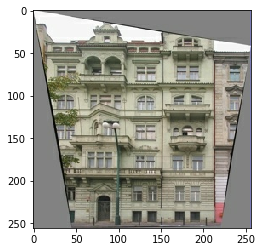

In [2]:
PATH = facades.download_dataset()

BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

print(PATH)

input, real = facades.load_dataset_image(PATH+'train/100.jpg')
plt.figure()
plt.imshow(input / 255.0)
plt.figure()
plt.imshow(real / 255.0)

W0730 13:20:28.297682 140441265063680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


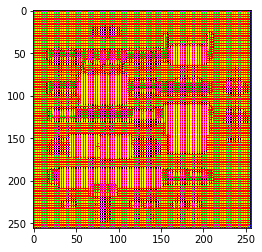

In [3]:
generator = UnetGenerator()
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Test generatig an image
gen_output = generator(input[tf.newaxis,...], training=False)
plt.imshow(gen_output[0,...])

In [4]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

!ls {checkpoint_dir}

# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

checkpoint		    ckpt-4.data-00001-of-00002
ckpt-1.data-00000-of-00002  ckpt-4.index
ckpt-1.data-00001-of-00002  ckpt-5.data-00000-of-00002
ckpt-1.index		    ckpt-5.data-00001-of-00002
ckpt-2.data-00000-of-00002  ckpt-5.index
ckpt-2.data-00001-of-00002  ckpt-6.data-00000-of-00002
ckpt-2.index		    ckpt-6.data-00001-of-00002
ckpt-3.data-00000-of-00002  ckpt-6.index
ckpt-3.data-00001-of-00002  ckpt-7.data-00000-of-00002
ckpt-3.index		    ckpt-7.data-00001-of-00002
ckpt-4.data-00000-of-00002  ckpt-7.index


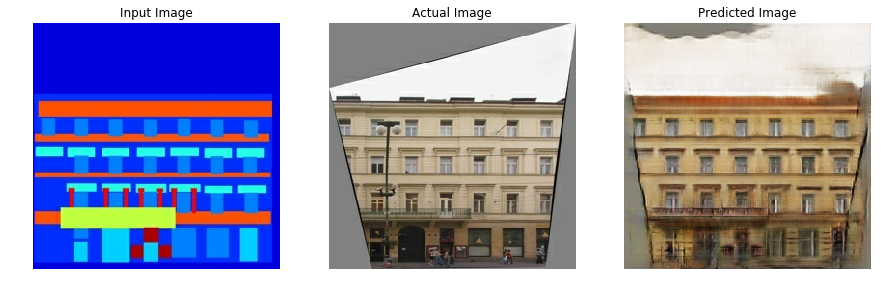

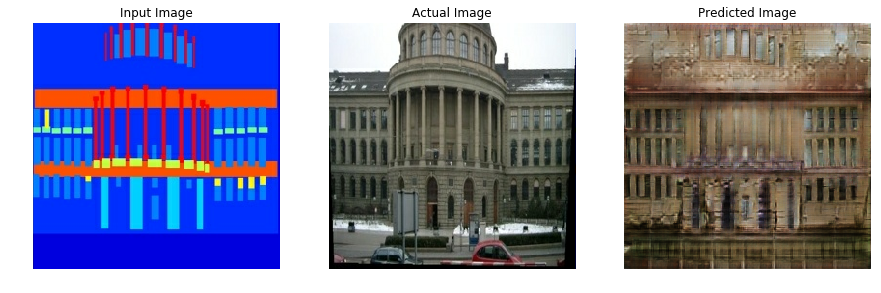

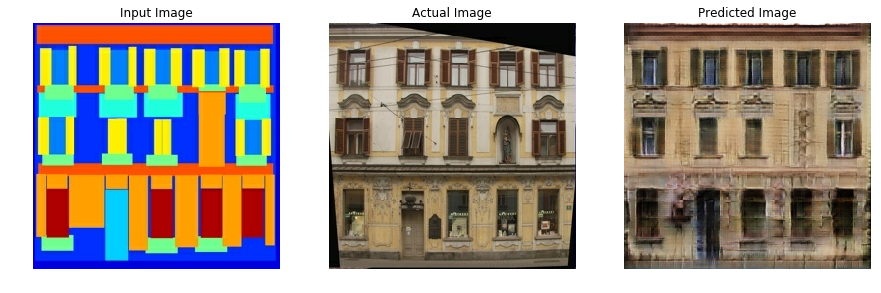

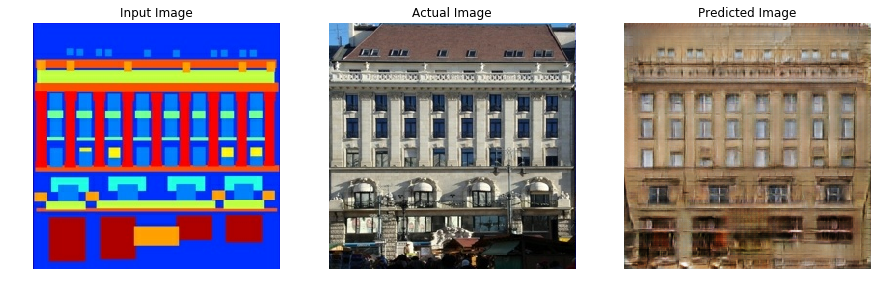

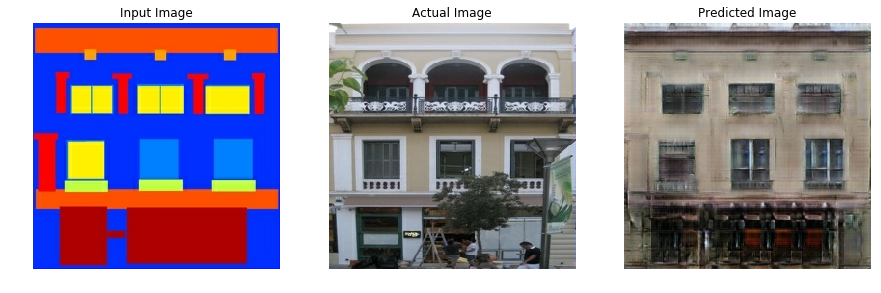

In [7]:
# Run the trained model on a few item of the test dataset
train_dataset, test_dataset = facades.load_dataset(BUFFER_SIZE)

for input, target in test_dataset.take(5):
  generate_images(generator, input, target)